<a href="https://colab.research.google.com/github/guilhermelaviola/MovieRatingAnalysis/blob/main/IMDbWatchlistStudy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Importing all the necessary libraries:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importing the dataset and displying the first 10 rows:
df = pd.read_excel('WATCHLIST.xlsx')
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin
2,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock
3,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman
6,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie
7,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro
9,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston


In [3]:
# Displaying the number of rows and columns in the dataset:
df.shape

(878, 10)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         878 non-null    datetime64[ns]
 1   Title           878 non-null    object        
 2   Title Type      878 non-null    object        
 3   IMDb Rating     878 non-null    float64       
 4   Runtime (mins)  878 non-null    int64         
 5   Year            878 non-null    int64         
 6   Genres          878 non-null    object        
 7   Num Votes       878 non-null    int64         
 8   Release Date    878 non-null    datetime64[ns]
 9   Directors       874 non-null    object        
dtypes: datetime64[ns](2), float64(1), int64(3), object(4)
memory usage: 68.7+ KB


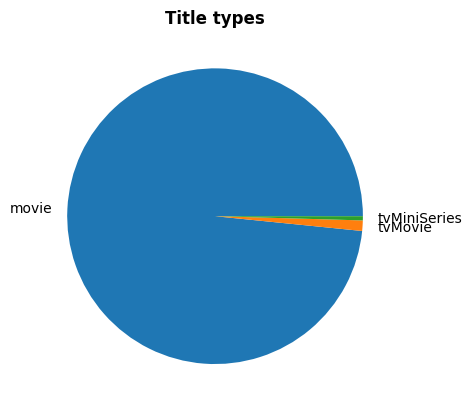

In [5]:
# Displaying the title types present in the dataset:
df['Title Type'].value_counts().plot(kind = 'pie')
plt.ylabel(None)
plt.title('Title types', fontweight = 'bold')
plt.show()

In [6]:
# Creating a datetime object based on the dates from the dataset:
df['Created'] = df['Created'].map(pd.to_datetime)
df['Day Created'] = df['Created'].apply(lambda x : x.day)
df['Month Created'] = df['Created'].apply(lambda x : x.month)
df['Year Created'] = df['Created'].apply(lambda x : x.year)

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 878 entries, 0 to 877
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Created         878 non-null    datetime64[ns]
 1   Title           878 non-null    object        
 2   Title Type      878 non-null    object        
 3   IMDb Rating     878 non-null    float64       
 4   Runtime (mins)  878 non-null    int64         
 5   Year            878 non-null    int64         
 6   Genres          878 non-null    object        
 7   Num Votes       878 non-null    int64         
 8   Release Date    878 non-null    datetime64[ns]
 9   Directors       874 non-null    object        
 10  Day Created     878 non-null    int64         
 11  Month Created   878 non-null    int64         
 12  Year Created    878 non-null    int64         
dtypes: datetime64[ns](2), float64(1), int64(6), object(4)
memory usage: 89.3+ KB


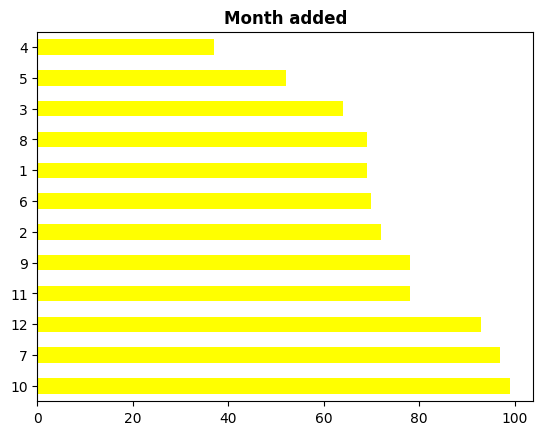

In [7]:
# Displaying distibution of months in which movies were added to the dataset:
df['Month Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Month added', fontweight = 'bold')
plt.show()

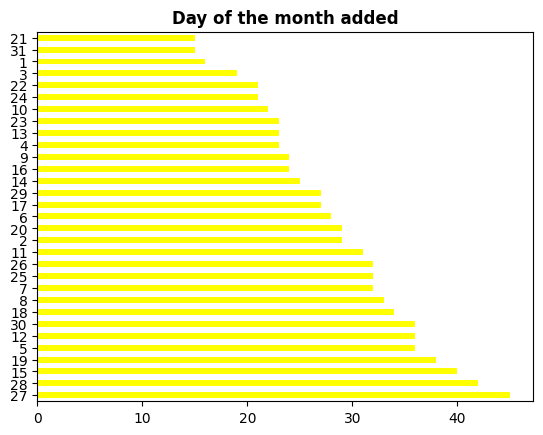

In [8]:
# Displaying distibution of days in which movies were added to the dataset:
df['Day Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Day of the month added', fontweight = 'bold')
plt.show()

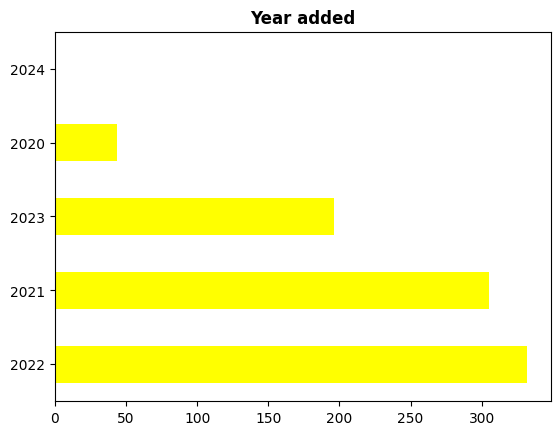

In [9]:
# Displaying distibution of years in which movies were added to the dataset:
df['Year Created'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Year added', fontweight = 'bold')
plt.show()

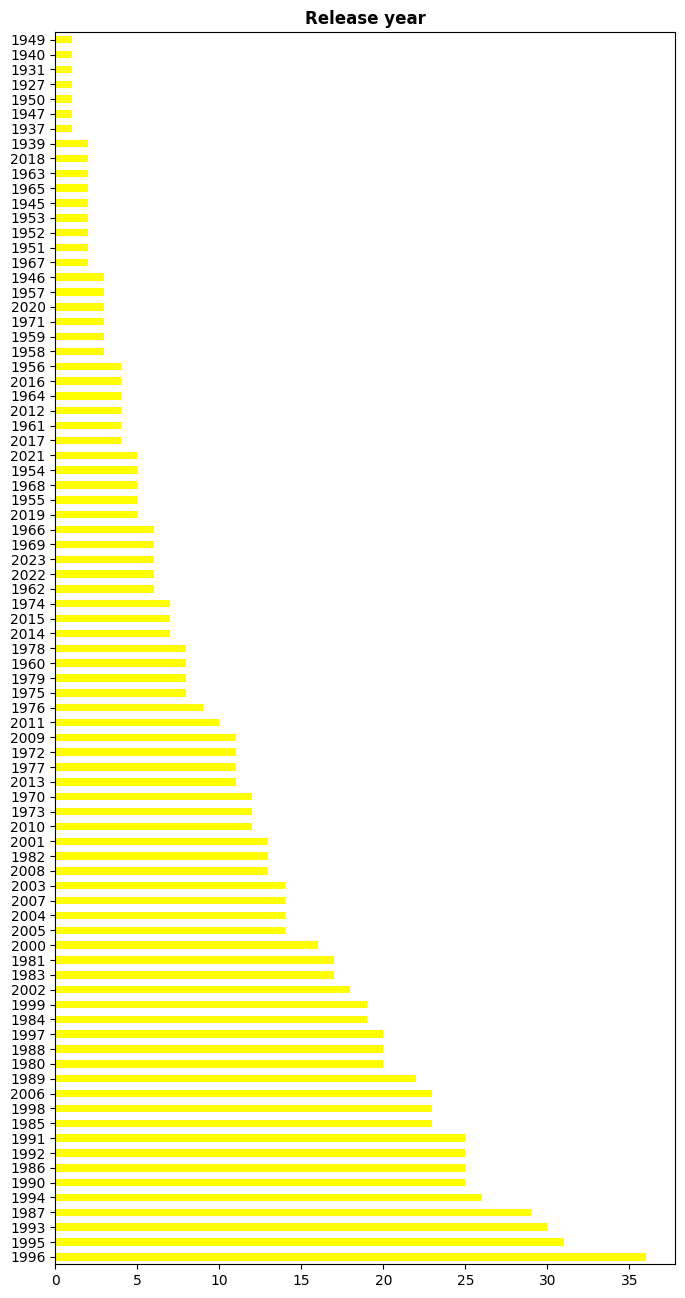

In [10]:
# Displaying distibution of release years in the dataset:
df['Year'].value_counts().plot(kind = 'barh', color = 'yellow', figsize = (8, 16))
plt.ylabel(None)
plt.title('Release year', fontweight = 'bold')
plt.show()

In [11]:
# Classifying the movies by quality based on their rating:
def imdb_rating(rating):
  if rating >= 9:
    quality = 'Excellent'
  elif rating >= 8 and rating < 9:
    quality = 'Amazing'
  elif rating >= 7 and rating < 8:
    quality = 'Good'
  elif rating >= 6 and rating < 7:
    quality = 'Okay'
  elif rating >= 5 and rating < 6:
    quality = 'Average'
  elif rating >= 4 and rating < 5:
    quality = 'Poor'
  else:
    quality = 'It sucks!'
  return quality

# Applying the function above on a column of the dataset and generating a new column as result:
df['Quality'] = df['IMDb Rating'].apply(imdb_rating)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood,18,4,2020,Good
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing
2,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing
3,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone,29,4,2020,Amazing
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton,7,5,2020,Good
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman,8,5,2020,Good
6,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie,11,5,2020,Average
7,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos,11,5,2020,Okay
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro,11,5,2020,Average
9,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston,11,5,2020,Average


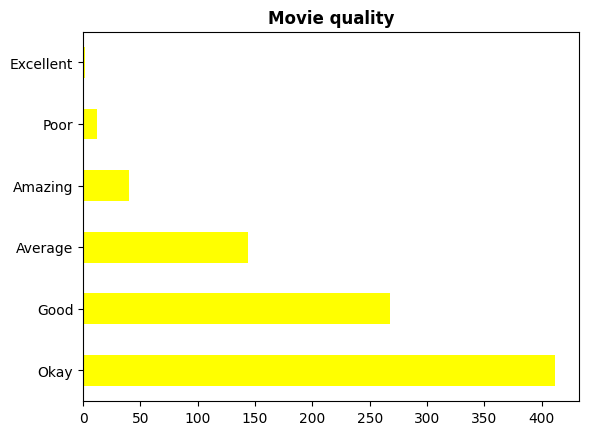

In [12]:
# Displaying the movie rating classification based on the algorithm above:
df['Quality'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie quality', fontweight = 'bold')
plt.show()

In [13]:
# Classifying the movies by popularity based on how many people rated them:
def movie_popularity(num_votes):
  if num_votes >= 2000000:
    popularity = 'Over 2M votes'
  elif num_votes >= 1000000 and num_votes < 2000000:
    popularity = 'Over 1M votes'
  elif num_votes >= 750000 and num_votes < 1000000:
    popularity = 'Over 750k votes'
  elif num_votes >= 500000 and num_votes < 750000:
    popularity = 'Over 500k votes'
  elif num_votes >= 250000 and num_votes < 500000:
    popularity = 'Over 250k votes'
  elif num_votes >= 100000 and num_votes < 250000:
    popularity = 'Over 100k votes'
  elif num_votes >= 10000 and num_votes < 100000:
    popularity = 'Over 10k votes'
  else:
    popularity = 'Less tnan 10k votes'
  return popularity

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie popularity'] = df['Num Votes'].apply(movie_popularity)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood,18,4,2020,Good,Over 100k votes
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes
2,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes
3,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone,29,4,2020,Amazing,Over 250k votes
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman,8,5,2020,Good,Over 250k votes
6,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie,11,5,2020,Average,Less tnan 10k votes
7,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos,11,5,2020,Okay,Less tnan 10k votes
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro,11,5,2020,Average,Over 10k votes
9,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston,11,5,2020,Average,Less tnan 10k votes


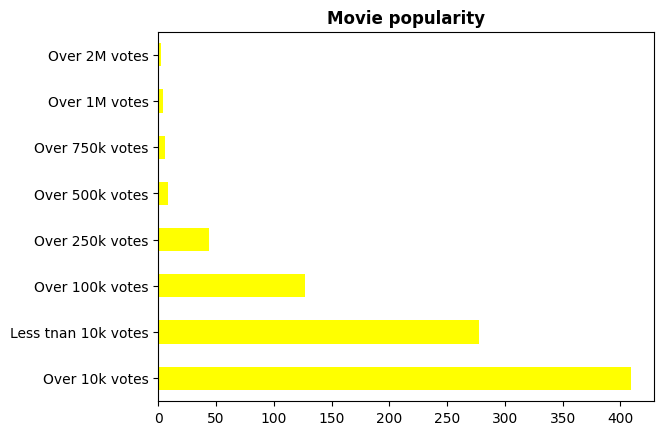

In [14]:
# Displaying the movie popularity based on the algorithm above:
df['Movie popularity'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie popularity', fontweight = 'bold')
plt.show()

In [15]:
# Classifying the movies by duration based on their runtime:
def movie_duration(runtime):
  if runtime >= 180:
    duration = 'Over 3h'
  elif runtime >= 150 and runtime < 180:
    duration = 'Between 2h30 and 2h59'
  elif runtime >= 120 and runtime < 150:
    duration = 'Between 2h and 2h29'
  elif runtime >= 100 and runtime < 120:
    duration = 'Between 1h40 and 1h59'
  elif runtime >= 90 and runtime < 100:
    duration = 'Between 1h30 and 1h39'
  elif runtime >= 70 and runtime < 90:
    duration = 'Between 1h10 and 1h29'
  else:
    duration = 'Shorter than 70 minutes'
  return duration

# Applying the function above on a column of the dataset and generating a new column as result:
df['Movie duration'] = df['Runtime (mins)'].apply(movie_duration)
df.head(10)

,Created,Title,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,Day Created,Month Created,Year Created,Quality,Movie popularity,Movie duration
0,2020-04-18,Tremors,movie,7.1,96,1990,"Comedy, Horror",147571,1990-01-19,Ron Underwood,18,4,2020,Good,Over 100k votes,Between 1h30 and 1h39
1,2020-04-29,The Great Dictator,movie,8.4,125,1940,"Comedy, Drama, War",234759,1940-10-15,Charles Chaplin,29,4,2020,Amazing,Over 100k votes,Between 2h and 2h29
2,2020-04-29,Vertigo,movie,8.3,128,1958,"Mystery, Romance, Thriller",421879,1958-05-09,Alfred Hitchcock,29,4,2020,Amazing,Over 250k votes,Between 2h and 2h29
3,2020-04-29,C'era una volta il West,movie,8.5,166,1968,Western,345563,1968-12-20,Sergio Leone,29,4,2020,Amazing,Over 250k votes,Between 2h30 and 2h59
4,2020-05-07,Sweeney Todd: The Demon Barber of Fleet Street,movie,7.3,116,2007,"Drama, Horror, Musical, Thriller",383632,2007-12-03,Tim Burton,7,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
5,2020-05-08,Ghostbusters,movie,7.8,105,1984,"Action, Comedy, Fantasy, Sci-Fi",439388,1984-06-07,Ivan Reitman,8,5,2020,Good,Over 250k votes,Between 1h40 and 1h59
6,2020-05-11,Lassie,movie,5.8,94,1994,"Family, Adventure",6612,1994-07-22,Daniel Petrie,11,5,2020,Average,Less tnan 10k votes,Between 1h30 and 1h39
7,2020-05-11,Far from Home: The Adventures of Yellow Dog,movie,6.3,81,1995,"Adventure, Family",3239,1995-01-13,Phillip Borsos,11,5,2020,Okay,Less tnan 10k votes,Between 1h10 and 1h29
8,2020-05-11,Flipper,movie,5.3,95,1996,"Adventure, Crime, Drama, Family",11570,1996-05-17,Alan Shapiro,11,5,2020,Average,Over 10k votes,Between 1h30 and 1h39
9,2020-05-11,Alaska,movie,5.7,109,1996,"Adventure, Drama, Family",5770,1996-08-14,Fraser C. Heston,11,5,2020,Average,Less tnan 10k votes,Between 1h40 and 1h59


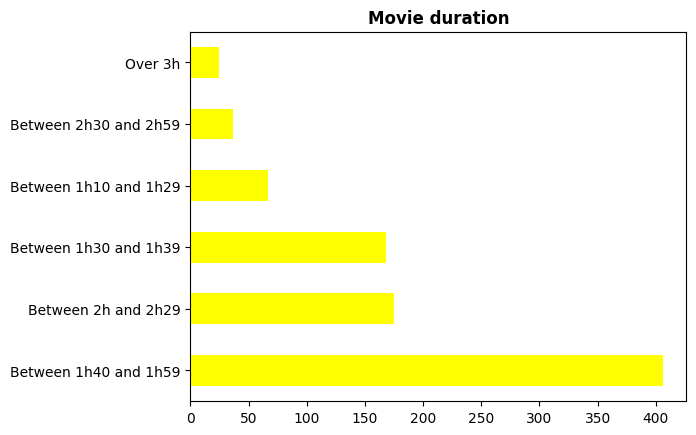

In [16]:
# Displaying the movie duration based on the algorithm above:
df['Movie duration'].value_counts().plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie duration', fontweight = 'bold')
plt.show()

In [17]:
# Creating a list of genres:
genre_list = pd.DataFrame({'Genres' : [
              'Action','Animation', 'Biography',
              'Comedy', 'Crime', 'Drama',
              'Documentary', 'Family', 'Fantasy',
              'Film-Noir', 'History', 'Horror',
              'Mystery', 'Music', 'Musical',
              'Romance', 'Sci-Fi', 'Sport',
              'Thriller', 'War', 'Western']})

In [27]:
# Splitting the genres by comma and removing leading spaces:
df['Genres'] = df['Genres'].str.split(',').apply(lambda x : [i.strip() for i in x])

In [28]:
# Exploding the list into separate rows:
df = df.explode('Genres')

In [29]:
# Counting Matrix using crosstab method:
genre_counts = pd.crosstab(index = df.index, columns = df['Genres'], margins = False).to_dict('index')
genre_counts = pd.DataFrame(genre_counts)

In [30]:
# Counting the number of 0s and 1s in each row:
counts = (genre_counts.apply(lambda row : [sum(row == 0), sum(row == 1)], axis = 1))

In [34]:
# Defining and displaying the final count with 2 columns ('False' and 'True'):
counts = pd.DataFrame(counts.tolist(), index = counts.index, columns = ['False', 'True'])
print(counts)

             False  True
Action         736   142
Adventure      750   128
Animation      858    20
Biography      800    78
Comedy         564   314
Crime          708   170
Documentary    871     7
Drama          271   607
Family         787    91
Fantasy        811    67
Film-Noir      873     5
History        826    52
Horror         846    32
Music          837    41
Musical        851    27
Mystery        806    72
Romance        673   205
Sci-Fi         809    69
Sport          821    57
Thriller       701   177
War            822    56
Western        847    31


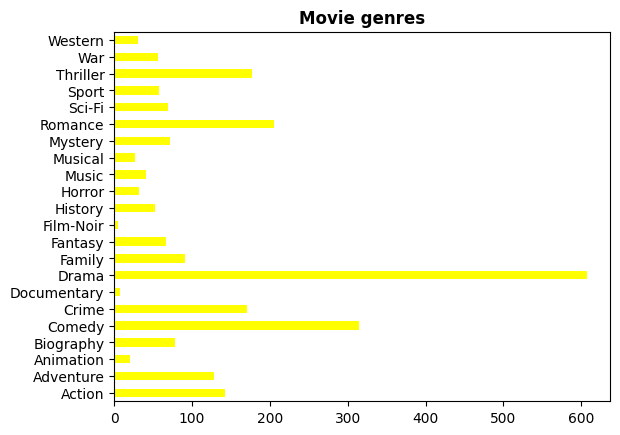

In [36]:
counts['True'].plot(kind = 'barh', color = 'yellow')
plt.ylabel(None)
plt.title('Movie genres', fontweight = 'bold')
plt.show()